# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [2]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [26]:
n = 50 # number of examples

xs = np.array([[random.random(), 1] for _ in range(n)]) # features
ys = np.array(list(map(lambda p: g(p[0]), xs))) # targets

ts = list(map(f, xs)) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

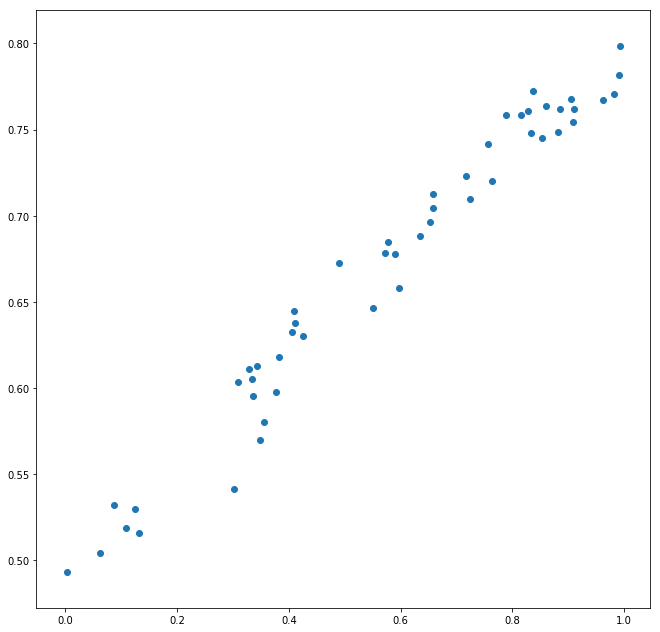

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [5]:
from statistics import mean

def l2_loss(ys, ps):
    assert len(ys) == len(ps)

    return mean((map(lambda pair: (pair[1]  - pair[0]) ** 2, zip(ys, ps))))

Please take a while to (roughly) guess the output before executing the cell below.

In [12]:
l2_loss(ys, ts)

0.0003713426856583735

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [36]:
import numpy as np


N = len(xs)
xsT = np.transpose(xs)
constant = np.dot(xsT, ys)
lr = 0.5 # step size

n_epochs = 100 # number of passes over the training data

def predict(vec, xM=xs):
    return np.dot(xM, vec)

def evaluate(vec, xM=xs, ys=ys):
    prediction = predict(vec)
    diff = ys - prediction
    return np.dot(np.transpose(diff), diff) / len(xs)

vec = np.zeros(2)
losses = []

for i in range(n_epochs):
    loss = evaluate(vec)
    losses.append(loss)
    gradient = (np.dot(xsT, predict(vec)) - constant) / N
    vec -= lr * gradient
    
print(vec)

[0.30727958 0.49614732]


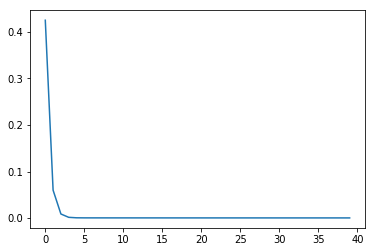

In [28]:
plt.plot(losses)

Let's now visually asses how we do on training data

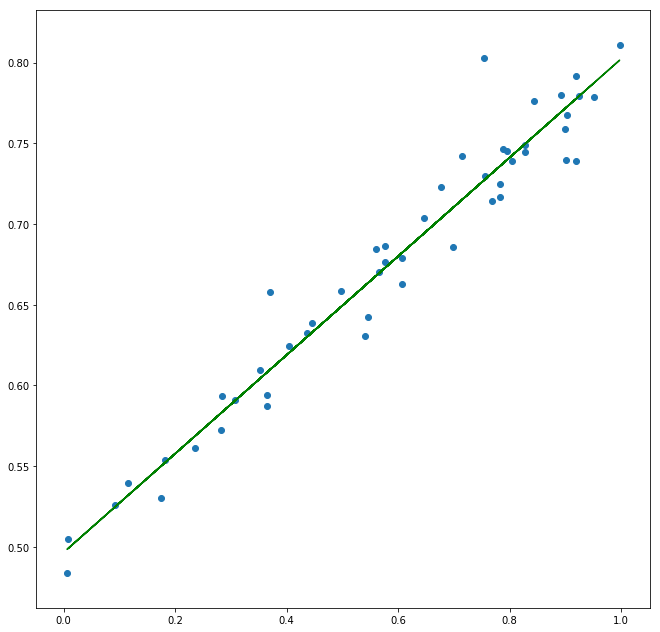

In [21]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

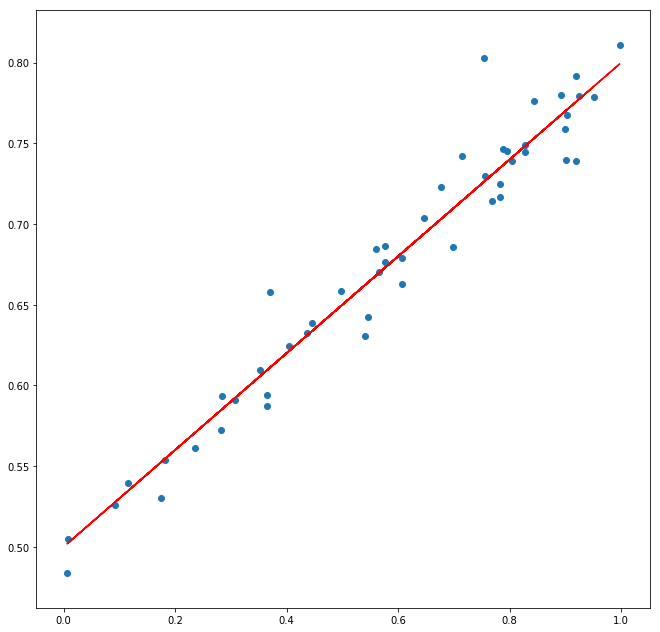

In [23]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, ts, c='r')

################################################################
# TODO: Add the (unobserved) ground truth, i.e. ts to the plot #
################################################################

plt.show()

Let's check our implementation vs. the one in sklearn

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(
    sk_loss, sk_a, sk_b))

Loss: 0.00036893 a:  0.30571, b:  0.49661
